# Machine Learning 1

## Linear Regression Assignment

### Problem Statement :  Model the price of cars with the available independent variables.

### step1: Reading and Understanding data 


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data
carprice = pd.read_csv("Carprice_Assignment.csv")
carprice.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
# Spliting the column CarName into CompanyName and ModalName columns
carprice1 = pd.DataFrame(carprice['CarName'].str.split(" ",1).tolist(),columns = ["companyname","modalname"])


carprice1.head()

,companyname,modalname
0,alfa-romero,giulia
1,alfa-romero,stelvio
2,alfa-romero,Quadrifoglio
3,audi,100 ls
4,audi,100ls


In [5]:
carprice = pd.concat([carprice,carprice1],axis=1)
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname,modalname
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [6]:
carprice.shape

(205, 28)

In [7]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Step 2 : Visualising Data 

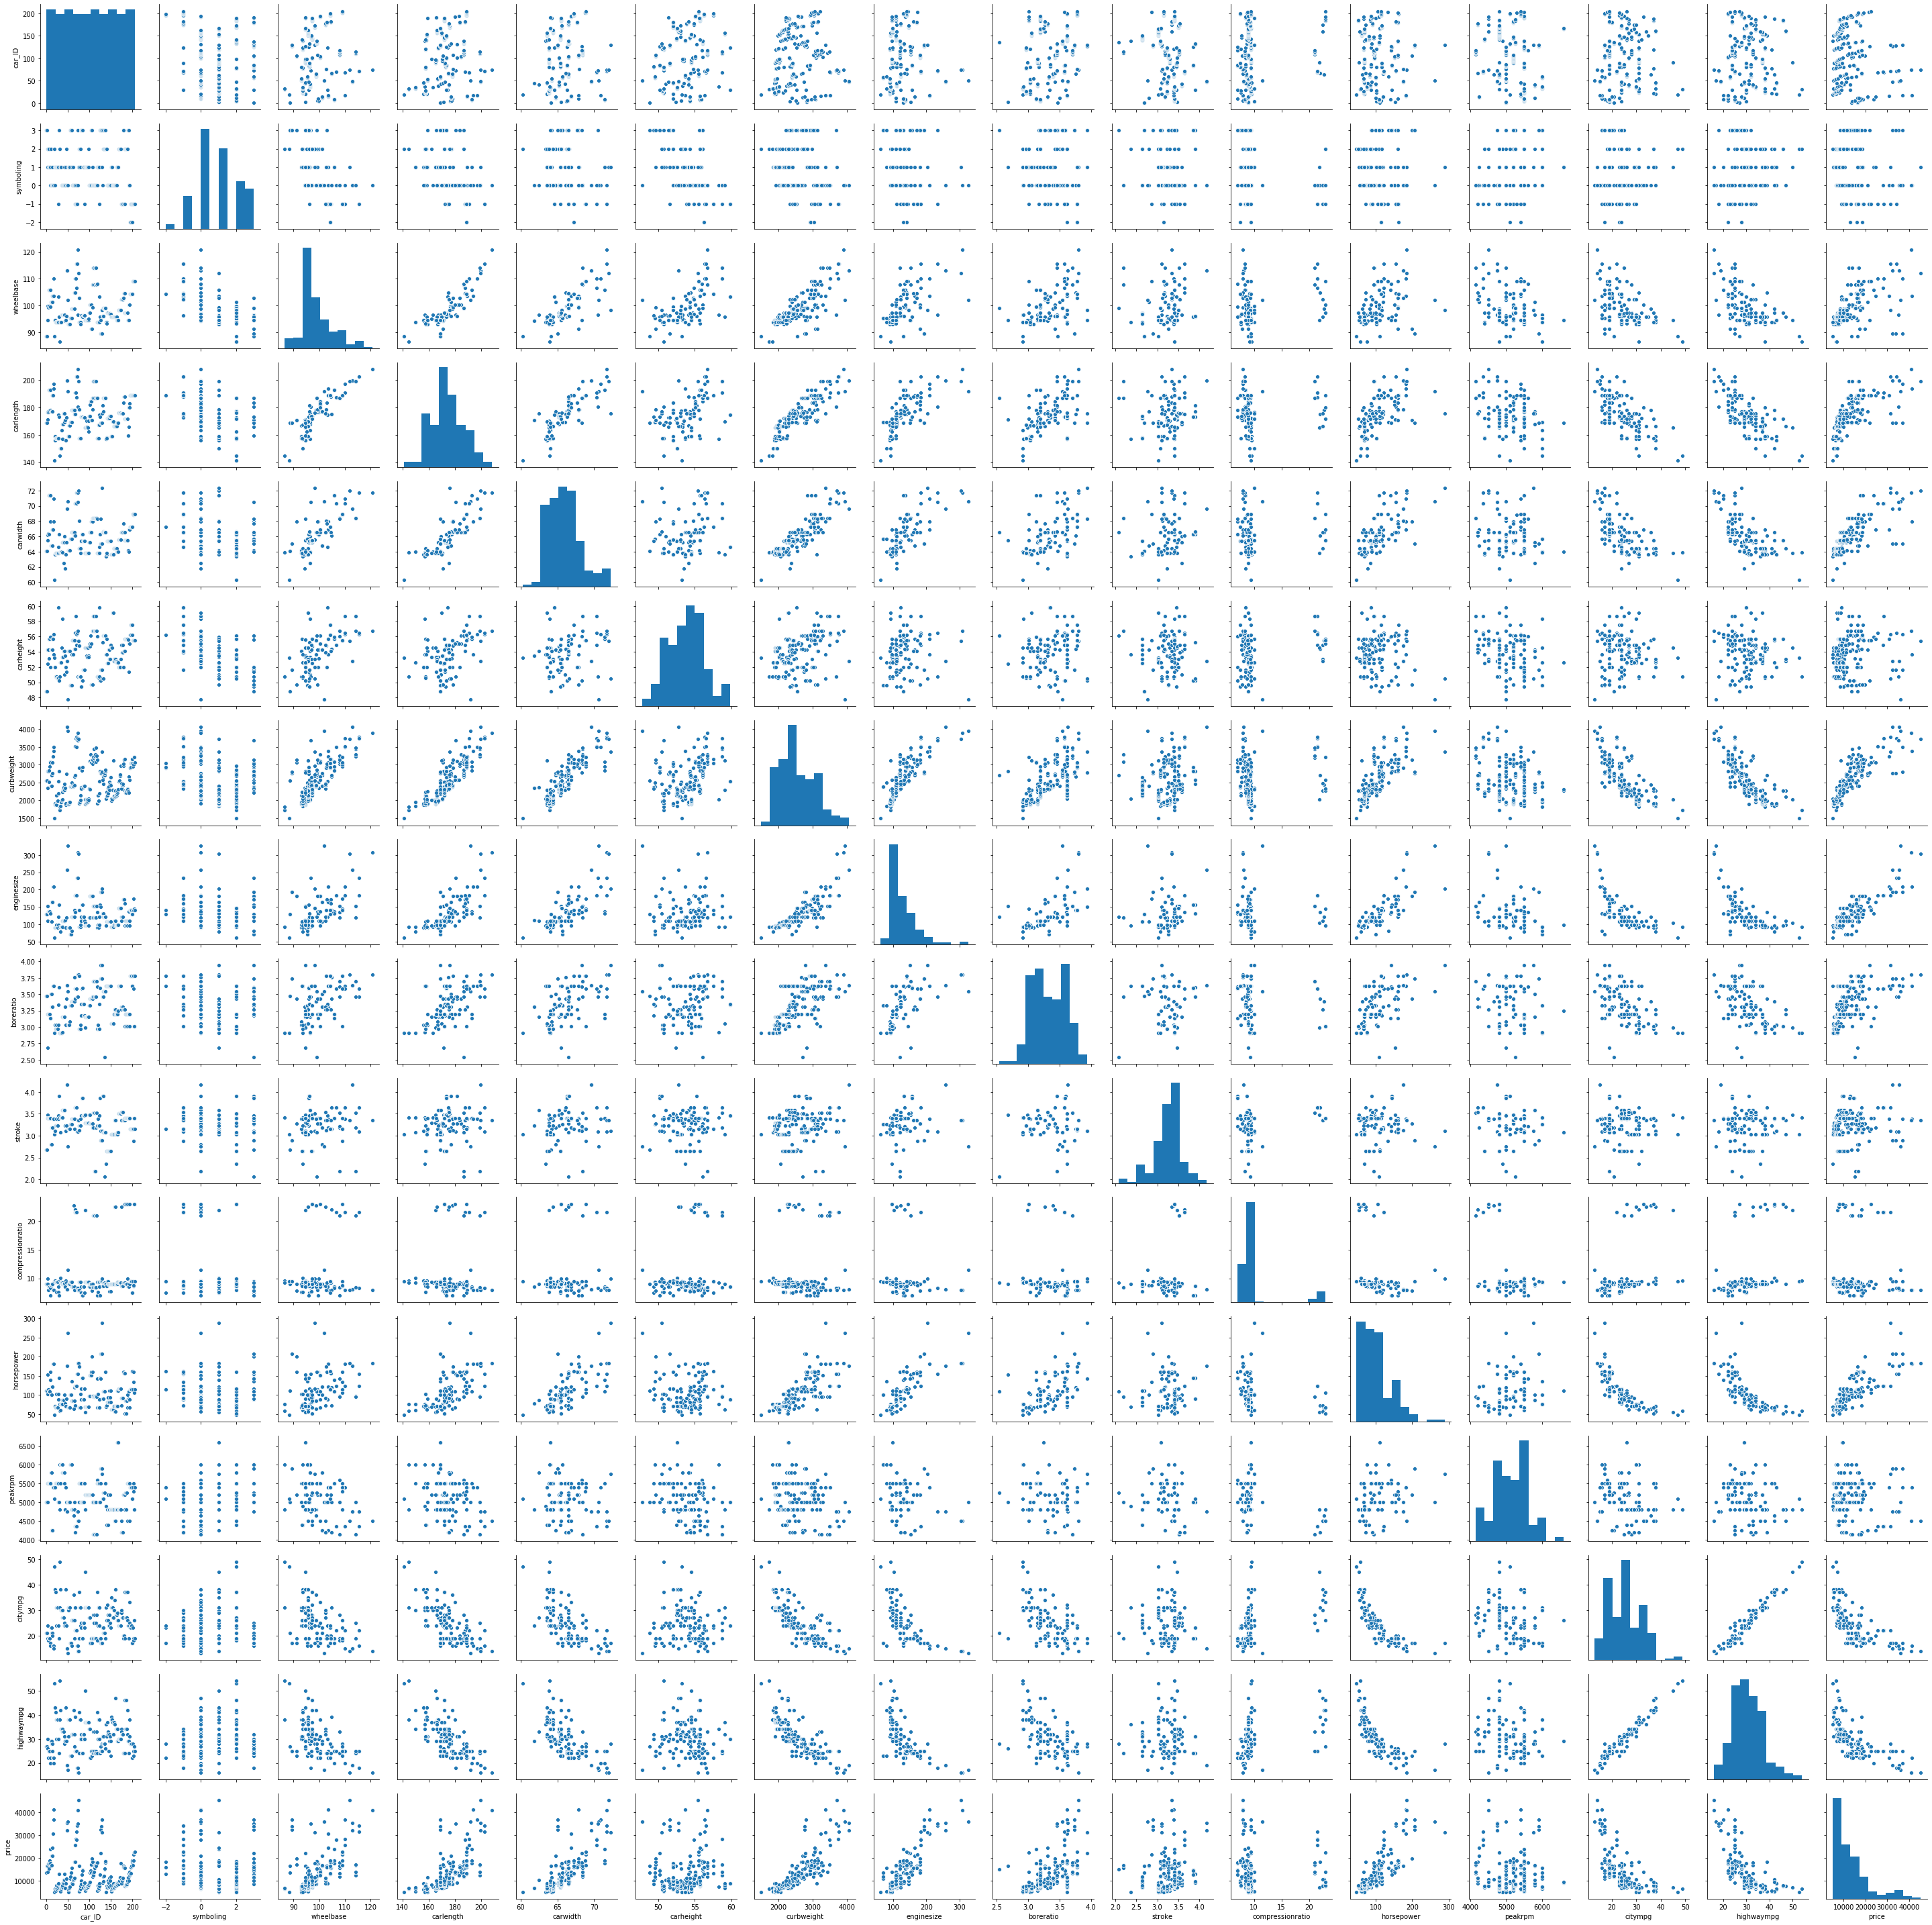

None


In [8]:
#First place to check for multicollinearity 
#We will visualise our data using matplotlib and seaborn
#Importing the libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Visualize all the Numeric Variables

sns.pairplot(carprice)
print(plt.show())

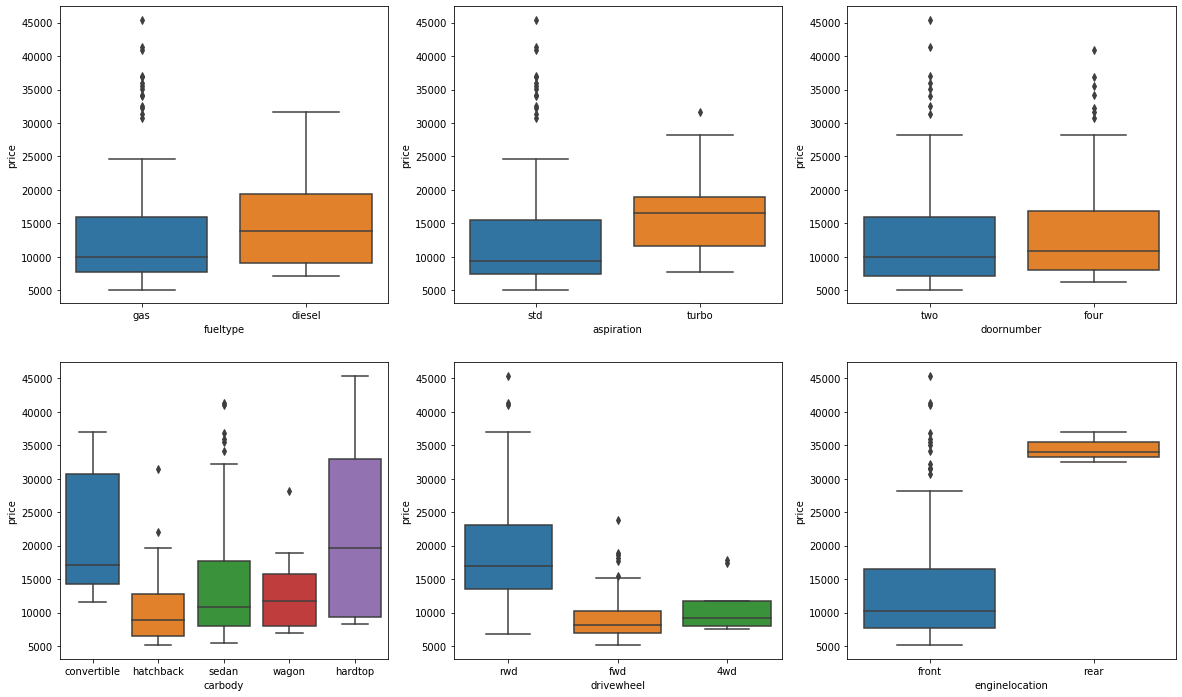

In [9]:
# Visualise Categorical variables. Let's make a box plot for these variables
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype',y='price',data = carprice)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y ='price',data = carprice)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber',y = 'price',data = carprice)
plt.subplot(2,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(2,3,5)
sns.boxplot(x = 'drivewheel',y= 'price', data = carprice)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)

plt.show()

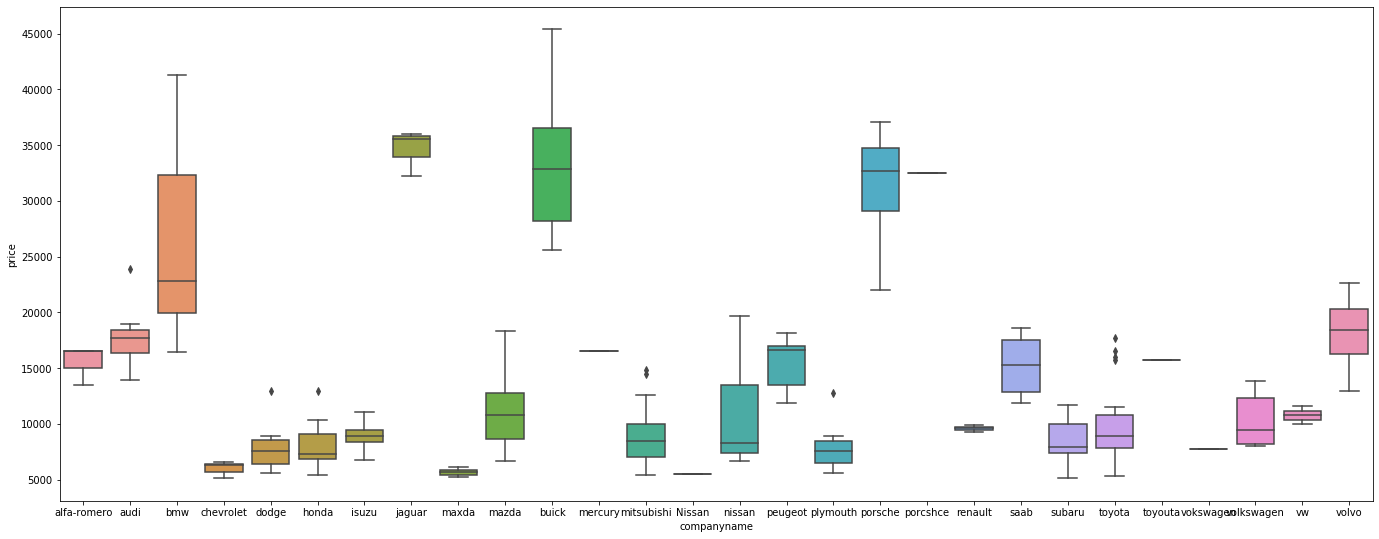

In [10]:
plt.figure(figsize = (80,20))
plt.subplot(2,3,1)
sns.boxplot(x = 'companyname', y = 'price', data = carprice)
#plt.subplot(2,3,2)
#sns.boxplot(x = 'modalname', y = 'price', data = carprice)
#plt.xscale('log')
plt.show()

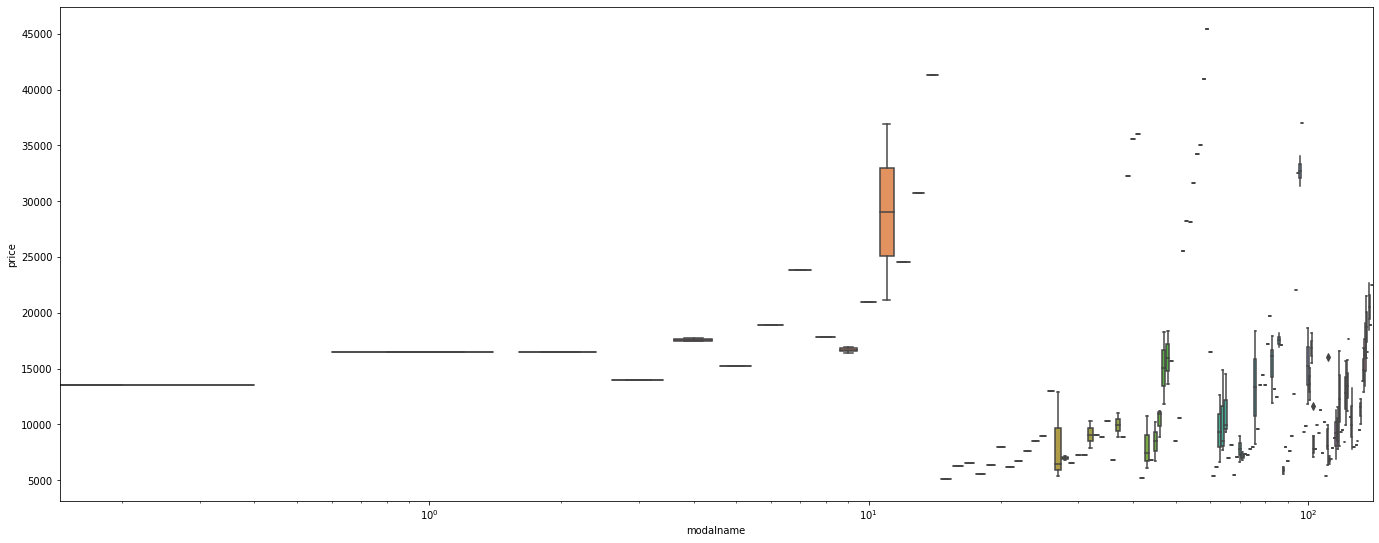

In [11]:
plt.figure(figsize = (80,20))
plt.subplot(2,3,1)
#sns.boxplot(x = 'companyname', y = 'price', data = carprice)
sns.boxplot(x = 'modalname', y = 'price', data = carprice)
plt.xscale('log')
plt.show()

## Step 3 :  Data Preparation
### from above box plots we can see that there are different categorical variables , in order to fit the regression line  we would need numeric values instead of categorical
### Now we need to convert them 

In [12]:
list1 = ['fueltype']
carprice[list1]= carprice[list1].apply(lambda x: x.map({'gas':1, 'diesel':0}))
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname,modalname
0,1,3,alfa-romero giulia,1,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,1,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,1,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,1,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,1,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [13]:
list1 = ['aspiration']
carprice[list1]= carprice[list1].apply(lambda x: x.map({'std':1, 'turbo':0}))
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname,modalname
0,1,3,alfa-romero giulia,1,1,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,1,1,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,1,1,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,1,1,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,1,1,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [14]:
list1 = ['doornumber']
carprice[list1]= carprice[list1].apply(lambda x: x.map({'two':1, 'four':0}))
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname,modalname
0,1,3,alfa-romero giulia,1,1,1,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,1,1,1,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,1,1,1,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,1,1,0,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,1,1,0,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [15]:
list1 = ['enginelocation']
carprice[list1]= carprice[list1].apply(lambda x: x.map({'front':1, 'rare':0}))
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname,modalname
0,1,3,alfa-romero giulia,1,1,1,convertible,rwd,1.0,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,1,1,1,convertible,rwd,1.0,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,1,1,1,hatchback,rwd,1.0,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,1,1,0,sedan,fwd,1.0,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,1,1,0,sedan,4wd,1.0,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [16]:
#Dummy variables
#the variables have 3 or more levels we use dummy variables
#get dummy variablesfor carbody and save them in new variable carbodydummy
#Let's drop the first column from carbodydummy dataframe using drop_first = True
carbodydummy = pd.get_dummies(carprice['carbody'],drop_first = True)
carbodydummy.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [17]:
#Add the result to oringinal dataframe
carprice = pd.concat([carprice,carbodydummy],axis=1)
#have a look at the dataframe
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,peakrpm,citympg,highwaympg,price,companyname,modalname,hardtop,hatchback,sedan,wagon
0,1,3,alfa-romero giulia,1,1,1,convertible,rwd,1.0,88.6,...,5000,21,27,13495.0,alfa-romero,giulia,0,0,0,0
1,2,3,alfa-romero stelvio,1,1,1,convertible,rwd,1.0,88.6,...,5000,21,27,16500.0,alfa-romero,stelvio,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,1,1,1,hatchback,rwd,1.0,94.5,...,5000,19,26,16500.0,alfa-romero,Quadrifoglio,0,1,0,0
3,4,2,audi 100 ls,1,1,0,sedan,fwd,1.0,99.8,...,5500,24,30,13950.0,audi,100 ls,0,0,1,0
4,5,2,audi 100ls,1,1,0,sedan,4wd,1.0,99.4,...,5500,18,22,17450.0,audi,100ls,0,0,1,0


In [18]:
drivewheeldummy = pd.get_dummies(carprice['drivewheel'],drop_first = True)
drivewheeldummy.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [19]:
#Add the result to oringinal dataframe
carprice = pd.concat([carprice,drivewheeldummy],axis=1)
#have a look at the dataframe
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,highwaympg,price,companyname,modalname,hardtop,hatchback,sedan,wagon,fwd,rwd
0,1,3,alfa-romero giulia,1,1,1,convertible,rwd,1.0,88.6,...,27,13495.0,alfa-romero,giulia,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,1,1,1,convertible,rwd,1.0,88.6,...,27,16500.0,alfa-romero,stelvio,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,1,1,1,hatchback,rwd,1.0,94.5,...,26,16500.0,alfa-romero,Quadrifoglio,0,1,0,0,0,1
3,4,2,audi 100 ls,1,1,0,sedan,fwd,1.0,99.8,...,30,13950.0,audi,100 ls,0,0,1,0,1,0
4,5,2,audi 100ls,1,1,0,sedan,4wd,1.0,99.4,...,22,17450.0,audi,100ls,0,0,1,0,0,0


In [20]:
# change the name starting with uppercase to lowercase
carprice['companyname']= carprice['companyname'].apply(lambda x : x.lower())

In [21]:
#replace phonetical names as one single name
carprice['companyname']= carprice['companyname'].apply(lambda x : x.replace('toyota','toyouta'))
carprice['companyname']= carprice['companyname'].apply(lambda x : x.replace('vokswagen','volkswagen'))
carprice['companyname']= carprice['companyname'].apply(lambda x : x.replace('vw','volkswagen'))
carprice['companyname']= carprice['companyname'].apply(lambda x : x.replace('porsche','porcshce'))
carprice['companyname']= carprice['companyname'].apply(lambda x : x.replace('maxda','mazda'))

carprice['companyname']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
          ...     
175        toyouta
176        toyouta
177        toyouta
178        toyouta
179        toyouta
180        toyouta
181        toyouta
182     volkswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189     volkswagen
190     volkswagen
191     volkswagen
192     volkswagen
193     volkswagen
194          volvo
195          volvo
196         

In [22]:
companynamedummy = pd.get_dummies(carprice['companyname'],drop_first = True)
carprice = pd.concat([carprice,companynamedummy],axis = 1)
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,nissan,peugeot,plymouth,porcshce,renault,saab,subaru,toyouta,volkswagen,volvo
0,1,3,alfa-romero giulia,1,1,1,convertible,rwd,1.0,88.6,...,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,1,1,1,convertible,rwd,1.0,88.6,...,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,1,1,1,hatchback,rwd,1.0,94.5,...,0,0,0,0,0,0,0,0,0,0
3,4,2,audi 100 ls,1,1,0,sedan,fwd,1.0,99.8,...,0,0,0,0,0,0,0,0,0,0
4,5,2,audi 100ls,1,1,0,sedan,4wd,1.0,99.4,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#modalnamedummy = pd.get_dummies(carprice['modalname'],drop_first = True)
#carprice = pd.concat([carprice,modalnamedummy],axis = 1)
#carprice.head()

In [24]:
#Drop the columns for which we created dummies
carprice.drop(['CarName','carbody','drivewheel','companyname','modalname'],axis = 1,inplace = True)


## step 4: Splitting the data into training and testing sets 
### First step for regression is performing test-train split


In [25]:
import sklearn
from sklearn.model_selection import train_test_split
#train and test data set has always the same rows we use np.random.seed(0)
np.random.seed(0)
df_train,df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)


In [26]:
#Rescaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Apply scaler to all variables except for categorical i.e dummy and other categorical variables
num_vars = ['car_ID','symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
           'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porcshce,renault,saab,subaru,toyouta,volkswagen,volvo
122,0.598039,0.6,1,1,0,1.0,0.244828,0.426016,0.291667,0.265487,...,0,0,1,0,0,0,0,0,0,0
125,0.612745,1.0,1,1,1,1.0,0.272414,0.452033,0.666667,0.212389,...,0,0,0,1,0,0,0,0,0,0
166,0.813725,0.6,1,1,1,1.0,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
1,0.004902,1.0,1,1,1,1.0,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,0,0,0
199,0.975490,0.2,1,0,0,1.0,0.610345,0.775610,0.575000,0.858407,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df_train.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porcshce,renault,saab,subaru,toyouta,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,142.0,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.478061,0.559441,0.909091,0.818182,0.440559,1.0,0.411141,0.525476,0.461655,0.509004,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.289106,0.239200,0.288490,0.387050,0.498199,0.0,0.205581,0.204848,0.184517,0.215378,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.232843,0.400000,1.000000,1.000000,0.000000,1.0,0.272414,0.399187,0.304167,0.353982,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.470588,0.600000,1.000000,1.000000,0.000000,1.0,0.341379,0.502439,0.425000,0.522124,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.718137,0.600000,1.000000,1.000000,1.000000,1.0,0.503448,0.669919,0.550000,0.668142,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


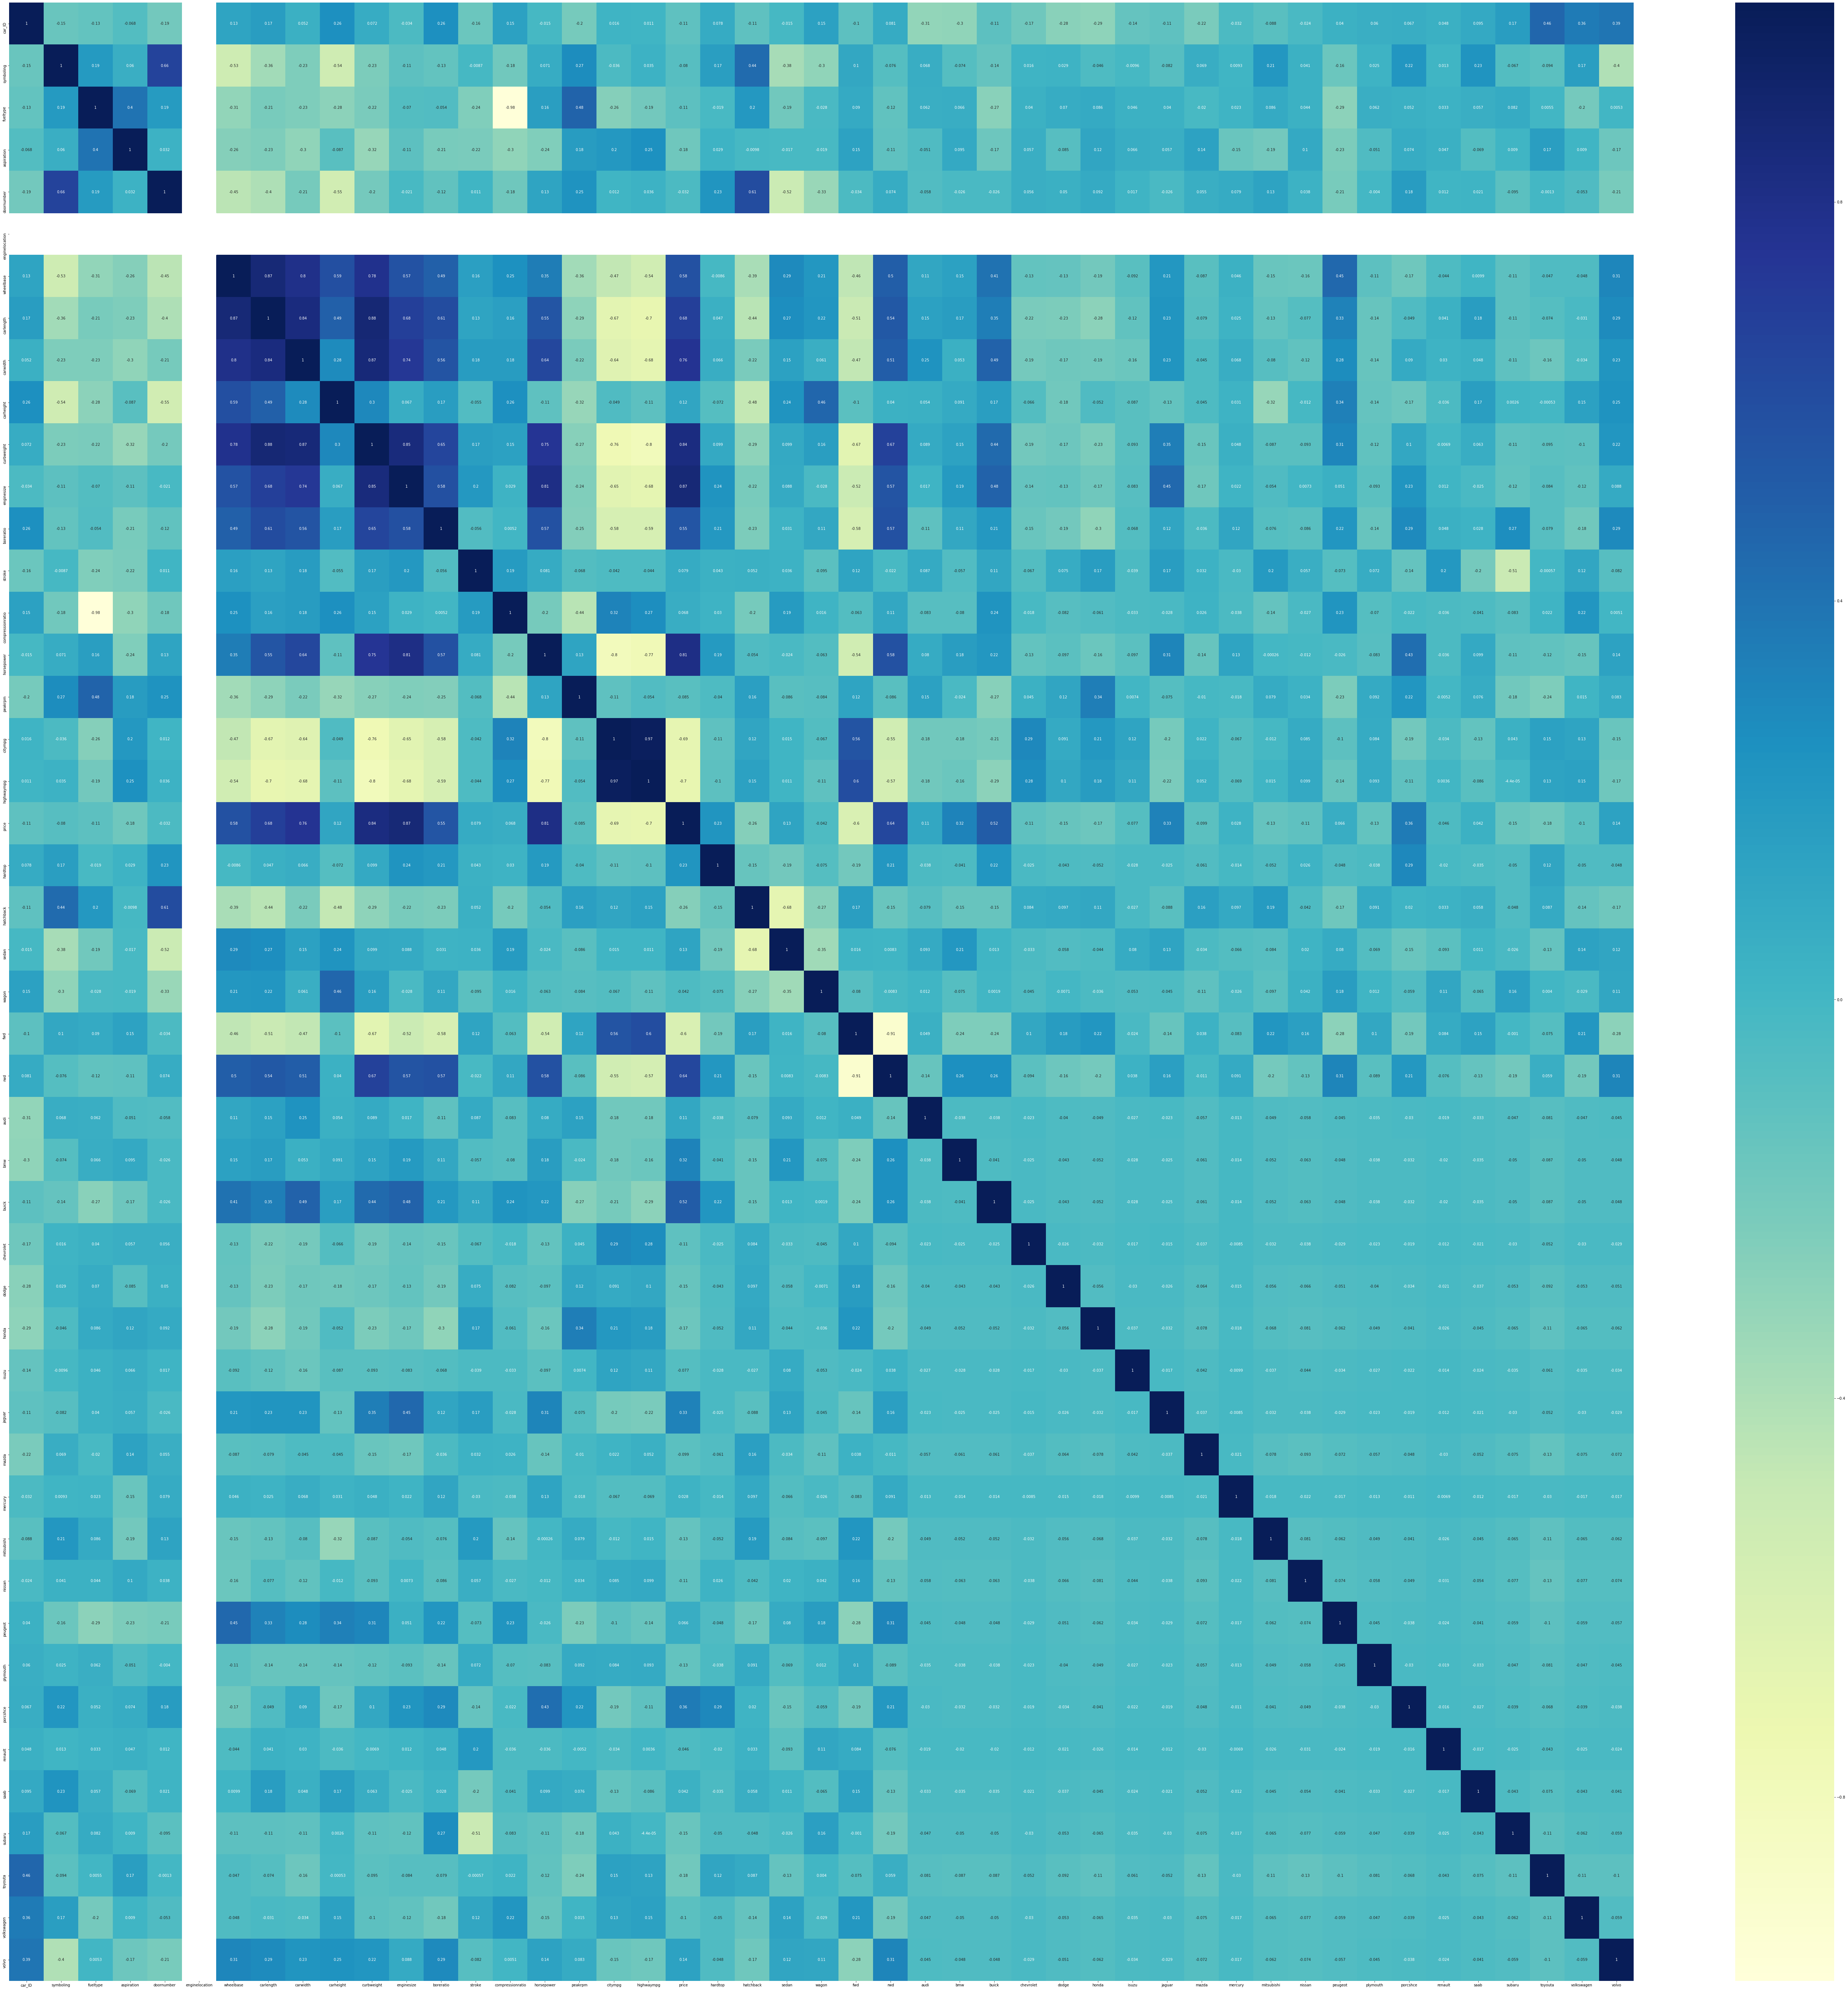

In [28]:
#let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (100,100))
#sns.heatmap(df_train.corr(),annot = True, cmap ='YlGnBu')
sns.heatmap(carprice.corr(),annot= True, cmap = 'YlGnBu')
plt.show()

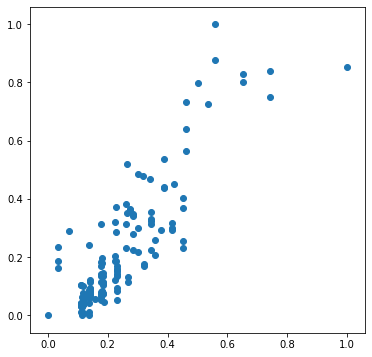

In [29]:
#since price is highly correlated with enginesize let's plot a pairplot for enginesize vs price
plt.figure(figsize = (6,6))
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

In [30]:
# so, we pick enginesize as the firstvariable and we'll try to fit a regression line to that
# Divide into X,y sets for modelbuilding
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

In [31]:
#Running the first model
#Assign feature variables to X
X = carprice[['enginesize','curbweight']]
#Assign response variable to y
y = carprice['price']

In [32]:
#Fit a regression line through the training data using statsmodels
#Remember you need to add a constant
#using linear regression function
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#Representing linear regression model as lm(creating linear regression object)
lm = LinearRegression()
#Fit the model to the training set
#lm.fit(X,y)

#Add a constant
X_train_lm = sm.add_constant(X_train['enginesize'])
#X = sm.add_constant(X)
#create a fitted model in one line
#lm_1 = sm.OLS(y,X).fit()
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary/ statestical info
lm.summary()
lm.params


const        -0.072888
enginesize    1.210676
dtype: float64

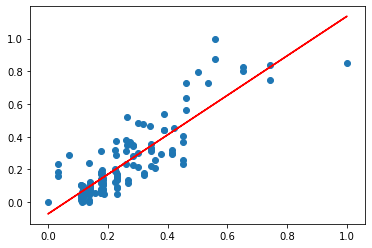

In [33]:
#lets visualise the data with a scatterplot and fitted regression line
plt.scatter(X_train_lm.iloc[:,1],y_train)
plt.plot(X_train_lm.iloc[:,1],-0.0728+1.21*X_train_lm.iloc[:,1],'r')
plt.show()

In [36]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.09e-44
Time:                        14:05:01   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values,i)for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,3.45
1,enginesize,1.00


In [38]:

X_train= carprice[['enginesize','curbweight']]
y_train = carprice['price']
#Build a linear model
X_train_lm = sm.add_constant(X_train)
lm1 = sm.OLS(y_train,X_train_lm).fit()
lm1.params

const        -14145.808249
enginesize      113.541474
curbweight        5.092131
dtype: float64

In [40]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     390.7
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           3.77e-70
Time:                        14:05:32   Log-Likelihood:                -1970.2
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     202   BIC:                             3956.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.415e+04   1387.924    -10.192      0.000   -1.69e+04   -1.14e+04
enginesize   113.5415     11.635      9.759      0.000      90.601     136.482
curbweight     5.0921      0.930      5.472      0.000       3.257       6.927
==============================================================================
Omnibus:                       38.837   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.341
Skew:                           0.871   Prob(JB):                     1.78e-19
Kurtosis:                       5.659   Cond. No.                     1.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values,i)for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,29.83
1,enginesize,3.62
2,curbweight,3.62


In [42]:
X_train= carprice[['enginesize','curbweight','horsepower']]
y_train = carprice['price']

In [43]:
#Add a constant
X_train_lm = sm.add_constant(X_train_lm)
#create a model
lm_2 = sm.OLS(y_train,X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     390.7
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           3.77e-70
Time:                        14:05:57   Log-Likelihood:                -1970.2
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     202   BIC:                             3956.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.415e+04   1387.924    -10.192      0.000   -1.69e+04   -1.14e+04
enginesize   113.5415     11.635      9.759      0.000      90.601     136.482
curbweight     5.0921      0.930      5.472      0.000       3.257       6.927
==============================================================================
Omnibus:                       38.837   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.341
Skew:                           0.871   Prob(JB):                     1.78e-19
Kurtosis:                       5.659   Cond. No.                     1.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,enginesize,45.36
1,curbweight,32.75
2,horsepower,23.81


In [46]:
#as p_value haas increased and the VIF also has a huge increase so we drop curbweight
X_train.drop('curbweight',1,)
X = carprice[['enginesize','horsepower','carwidth']]
y = carprice['price']

In [47]:
#Add a constant
X = sm.add_constant(X)
#create a model
lm_3 = sm.OLS(y,X).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     298.9
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           8.26e-74
Time:                        14:07:14   Log-Likelihood:                -1958.5
No. Observations:                 205   AIC:                             3925.
Df Residuals:                     201   BIC:                             3938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.021e+04   1.02e+04     -5.889      0.000   -8.04e+04      -4e+04
enginesize    94.9419     11.255      8.436      0.000      72.749     117.135
horsepower    52.8026     10.460      5.048      0.000      32.177      73.429
carwidth     848.6984    166.971      5.083      0.000     519.459    1177.938
==============================================================================
Omnibus:                       25.166   Durbin-Watson:                   0.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.522
Skew:                           0.622   Prob(JB):                     4.80e-11
Kurtosis:                       5.004   Cond. No.                     7.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,1806.44
1,enginesize,3.78
2,horsepower,2.94
3,carwidth,2.21


## We can absorve that the model obtained is pretty good  as the p_value of all variables is 0 , r2 and adjusted r2 are 81.7 and 81.4 reapectly and the prob(F_stats) is also quite high compared to other models, but lets check for other features also. 

In [51]:
#on adding carwidth we can see a light incerase in R_squared and Adj_R_squared where in we can also abserve a slight hike in p value
#let's add carlength and see if there is any significant change
X = carprice[['enginesize','horsepower','carwidth','carlength']]
y = carprice['price']

In [52]:
#Add a constant
X = sm.add_constant(X)
#create a model
lm_4 = sm.OLS(y,X).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     223.4
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.35e-72
Time:                        14:11:40   Log-Likelihood:                -1958.3
No. Observations:                 205   AIC:                             3927.
Df Residuals:                     200   BIC:                             3943.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.794e+04   1.11e+04     -5.231      0.000   -7.98e+04   -3.61e+04
enginesize    93.6744     11.519      8.132      0.000      70.961     116.388
horsepower    53.4250     10.543      5.068      0.000      32.636      74.214
carwidth     763.1869    230.796      3.307      0.001     308.081    1218.292
carlength     19.8983     37.004      0.538      0.591     -53.070      92.867
==============================================================================
Omnibus:                       24.703   Durbin-Watson:                   0.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.008
Skew:                           0.616   Prob(JB):                     1.02e-10
Kurtosis:                       4.967   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## We observe the prob(f-stats) has decreased and also the p_value is 0.591 for carlength which is high.

In [54]:
#lets check the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,2112.97
3,carwidth,4.20
1,enginesize,3.94
4,carlength,3.57
2,horsepower,2.98


In [57]:
# Though there is no significant change in R and Adj_R we can see  the prob(F_stats) has decreased and p_ value is high i.e., an insignificance so better we drop the carlength
#X = X_train.drop('carlength',1,)
X = carprice[['enginesize','horsepower','carwidth','boreratio']]
y = carprice['price']

In [58]:
#Add a constant
X = sm.add_constant(X)
#create a model
lm_5 = sm.OLS(y,X).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     223.5
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.33e-72
Time:                        14:17:51   Log-Likelihood:                -1958.3
No. Observations:                 205   AIC:                             3927.
Df Residuals:                     200   BIC:                             3943.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.966e+04   1.03e+04     -5.799      0.000   -7.99e+04   -3.94e+04
enginesize    95.7153     11.359      8.427      0.000      73.317     118.113
horsepower    53.9480     10.676      5.053      0.000      32.895      75.001
carwidth     869.6290    171.388      5.074      0.000     531.671    1207.587
boreratio   -644.5333   1151.706     -0.560      0.576   -2915.579    1626.512
==============================================================================
Omnibus:                       26.224   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.268
Skew:                           0.634   Prob(JB):                     7.37e-12
Kurtosis:                       5.096   Cond. No.                     7.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,1823.03
1,enginesize,3.83
2,horsepower,3.05
3,carwidth,2.32
4,boreratio,1.67


In [60]:
#p_value is high for boreratio so drop it
#we see an insignificance due to curbweight lets create an other model eliminating it
X = carprice[['enginesize','horsepower','carwidth','wheelbase']]
y = carprice['price']

In [61]:
#Add a constant
X = sm.add_constant(X)
#create a model
lm_6 = sm.OLS(y,X).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.5
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           6.27e-73
Time:                        14:18:37   Log-Likelihood:                -1957.5
No. Observations:                 205   AIC:                             3925.
Df Residuals:                     200   BIC:                             3942.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.443e+04   1.11e+04     -4.921      0.000   -7.62e+04   -3.26e+04
enginesize    90.9774     11.608      7.837      0.000      68.087     113.868
horsepower    59.1435     11.444      5.168      0.000      36.577      81.711
carwidth     612.2659    241.567      2.535      0.012     135.921    1088.610
wheelbase     97.7302     72.295      1.352      0.178     -44.828     240.288
==============================================================================
Omnibus:                       27.430   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.045
Skew:                           0.667   Prob(JB):                     3.03e-12
Kurtosis:                       5.105   Cond. No.                     9.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,2123.06
3,carwidth,4.64
1,enginesize,4.04
2,horsepower,3.54
4,wheelbase,3.27


In [63]:
#High p_value for wheelbase so drop it
#X = X_train.drop('wheelbase')
X = carprice[['enginesize','horsepower','carwidth','stroke']]
y = carprice['price']

In [64]:
#Add a constant
X = sm.add_constant(X)
#create a model
lm_7 = sm.OLS(y,X).fit()
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.8
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           2.34e-74
Time:                        14:19:47   Log-Likelihood:                -1954.2
No. Observations:                 205   AIC:                             3918.
Df Residuals:                     200   BIC:                             3935.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.518e+04   1.02e+04     -5.419      0.000   -7.53e+04   -3.51e+04
enginesize   100.7654     11.226      8.976      0.000      78.630     122.901
horsepower    48.1633     10.390      4.636      0.000      27.676      68.650
carwidth     881.5718    164.288      5.366      0.000     557.613    1205.531
stroke     -2288.9991    780.981     -2.931      0.004   -3829.013    -748.985
==============================================================================
Omnibus:                       26.430   Durbin-Watson:                   0.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.980
Skew:                           0.615   Prob(JB):                     1.15e-12
Kurtosis:                       5.219   Cond. No.                     7.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,1859.24
1,enginesize,3.90
2,horsepower,3.01
3,carwidth,2.22
4,stroke,1.07


In [70]:
#the above model is quite good with 0.824 and 0821 as r2 and adjusted r2 respectively and p_values are also quite small and vif's below 4

In [103]:
X = carprice[['enginesize','horsepower','carwidth','stroke','carheight']]
y = carprice['price']

In [104]:
#Add a constant
X = sm.add_constant(X)
#create a model
lm_8 = sm.OLS(y,X).fit()
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           3.31e-74
Time:                        15:03:51   Log-Likelihood:                -1948.8
No. Observations:                 205   AIC:                             3912.
Df Residuals:                     198   BIC:                             3935.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.378e+04   1.13e+04     -3.870      0.000   -6.61e+04   -2.15e+04
enginesize    95.1177     11.131      8.545      0.000      73.167     117.069
horsepower    65.9896     11.658      5.660      0.000      43.000      88.980
carwidth     630.9809    182.542      3.457      0.001     271.005     990.957
stroke     -2548.7647    789.886     -3.227      0.001   -4106.434    -991.095
carheight    133.8910    109.464      1.223      0.223     -81.974     349.756
fueltype   -2622.1748    917.330     -2.858      0.005   -4431.166    -813.184
==============================================================================
Omnibus:                       21.984   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.504
Skew:                           0.501   Prob(JB):                     7.98e-11
Kurtosis:                       5.107   Cond. No.                     9.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,1925.56
1,enginesize,3.93
2,horsepower,3.46
3,carwidth,2.64
5,carheight,1.32
4,stroke,1.10


In [125]:
X = carprice[['enginesize','horsepower','carwidth','stroke','fueltype']]
y = carprice['price']

In [126]:
#Add a constant
X = sm.add_constant(X)
#create a model
lm_8 = sm.OLS(y,X).fit()
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     197.2
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           4.70e-75
Time:                        15:14:15   Log-Likelihood:                -1949.6
No. Observations:                 205   AIC:                             3911.
Df Residuals:                     199   BIC:                             3931.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.083e+04   1.11e+04     -3.690      0.000   -6.27e+04    -1.9e+04
enginesize    96.0935     11.116      8.644      0.000      74.173     118.014
horsepower    61.7628     11.148      5.540      0.000      39.779      83.746
carwidth     710.1245    170.902      4.155      0.000     373.113    1047.136
stroke     -2716.3698    778.879     -3.488      0.001   -4252.285   -1180.454
fueltype   -2742.8576    913.145     -3.004      0.003   -4543.539    -942.176
==============================================================================
Omnibus:                       21.925   Durbin-Watson:                   0.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.314
Skew:                           0.476   Prob(JB):                     1.96e-11
Kurtosis:                       5.206   Cond. No.                     8.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,2284.60
1,enginesize,3.98
2,horsepower,3.61
3,carwidth,2.50
5,fueltype,1.37
4,stroke,1.11


## we can observe both the models lm_3 and lm_7 are quite good models lets go a head and make predictions on each of it and check which is the best.

Text(0.5, 0.98, 'Error Terms')

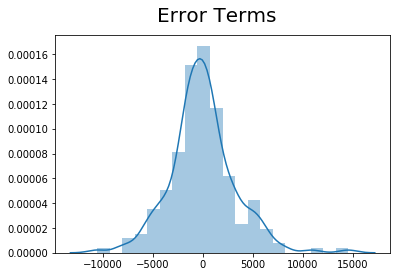

In [128]:
#Making predictions using lm_7
#residual Analysis
y_train_price = lm_8.predict(X)
#plot the histogram of error terms
fig = plt.figure()
sns.distplot((y_train-y_train_price),bins =20)
fig.suptitle('Error Terms', fontsize = 20)




In [129]:
#Making predictions using final model
#Apply scaling on test sets
x = carprice[['enginesize','horsepower','carwidth','stroke','fueltype']]

X = sm.add_constant(X)
predicted_price = lm_8.predict(X)

In [130]:
import sklearn
from sklearn.metrics import mean_squared_error , r2_score
mse = mean_squared_error(carprice.price,predicted_price)
r_squared = r2_score(carprice.price,predicted_price)
print('mean_squared_error',mse)
print('r_squared_value',r_squared)

mean_squared_error 10667496.694868883
r_squared_value 0.8320355301981777


In [131]:

carprice['price'].shape
predicted_price.shape
y = np.reshape(np.ravel(predicted_price),(205,1))
x = np.reshape(np.ravel(carprice['price']),(205,1))


Text(0, 0.5, 'price')

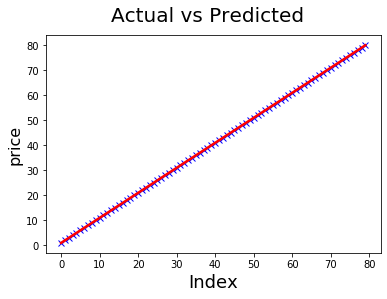

In [132]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,'x',color = 'blue', linewidth = 2.5)
plt.plot(c,'y', color = 'red', linewidth = 2.5)
#plt.plot(c,'x',color = 'blue', linewidth = 2.5, line_style = "-")
#plt.plot(c,'y', color = 'red', linewidth = 2.5, line_style = "-")
fig.suptitle("Actual vs Predicted",fontsize = 20)
plt.xlabel('Index',fontsize = 18)
plt.ylabel('price', fontsize = 16)

# The model lm_8 is quite good model having significantly low p_value which implies the model is significant and r2 and adjusted r2 values are nearly same and high values. Taking these into account we can asy that the lm_8 in the best fit model .
# We can say that the price vary with respect to the 'Enginesize', 'Horsepower' 'Carwidth','Stroke' and the 'fueltype'.

